# <center><span style="color:GREEN">PYTHON MACHINE LEARNING COURSE</span></center>

# <center><span style="color:RED">BOOK RATING PREDICTION MODEL GROUP 14</span></center>

## 1 - IMPORTING THE NECESSARY PACKAGES into the project

In [1087]:
import pandas as pd
import sklearn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
## import plotly.express as px
import seaborn as sns
from ipywidgets import widgets
from datetime import datetime, date, time
import csv

## 2 - IMPORTATION OF DATA FOR CREATING DATAFRAME 

In [909]:
bookrate_df = pd.read_csv(r"C:\Users\Utilisateur\Desktop\Warm Up\Machine Learning labs\GROUPE_14\books.csv", index_col ="bookID")
bookrate_df 

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


## 3 - DATA ANALYSIS AND FEATURE SELECTING

## A - Checking the composition of DataFrame

### a) Verifying the type of each attribute of our dataframe

  This is to have a first overview of the numerical data which will be potentially useful for our MODEL

In [910]:
bookrate_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### b) Search for missing values
 To know what potential transformation we will have to do empty lines later
in our case we do not have MISSING VALUES this is partly due to the fact that we made a small manual transformation on 4 lines **(with the bookID: 12224, 16914, 22128, 34889)** of our DATAFRAME

In [911]:
bookrate_df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

### c) Verification of the number of columns and their name

In [912]:
bookrate_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

### d) Verification of the number of indexs

In [913]:
bookrate_df.index

Index([    1,     2,     4,     5,     8,     9,    10,    12,    13,    14,
       ...
       45617, 45623, 45625, 45626, 45630, 45631, 45633, 45634, 45639, 45641],
      dtype='int64', name='bookID', length=11127)

### e) Verification of unique values by Columns 
This can be helpful to see how which attribute can be categorize or group by intervalle

In [914]:
bookrate_df.nunique()

title                 10352
authors                6643
average_rating          209
isbn                  11127
isbn13                11127
language_code            27
  num_pages             997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2292
dtype: int64

## B - Analysis of our DataFrame

### a) Analysis of all the numerical value
To globally explore and see some information like outliers , BIAS or other useful information

In [915]:
bookrate_df.describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000,1.112700e+04,11127.000,11127.000,11127.000
mean,3.934,9.759888e+12,336.377,17936.409,541.854
std,0.352,4.428964e+11,241.127,112479.441,2576.177
min,0.000,8.987060e+09,0.000,0.000,0.000
25%,3.770,9.780345e+12,192.000,104.000,9.000
50%,3.960,9.780586e+12,299.000,745.000,46.000
75%,4.135,9.780873e+12,416.000,4993.500,237.500
max,5.000,9.790008e+12,6576.000,4597666.000,94265.000


### b) Analysis of all the categorical value

In [916]:
bookrate_df.describe(include ="O")

,title,authors,isbn,language_code,publication_date,publisher
count,11127,11127,11127,11127,11127,11127
unique,10352,6643,11127,27,3679,2292
top,The Brothers Karamazov,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8911,56,318


Here we can see the global observation of average rating can tell us that most of the books are well note. And we are going to study more About the average rating

## C - Analysis and exploration of Attributes

###  Average_rating exploration

###### . Find the the distribution of average_rating 

<Axes: xlabel='average_rating', ylabel='Count'>

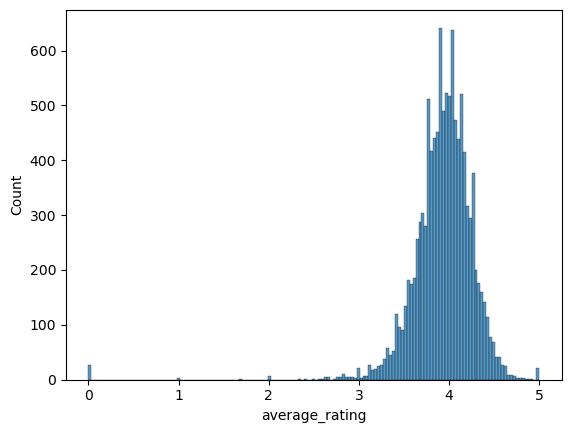

In [917]:
sns.histplot(data=bookrate_df,x="average_rating")

By closely visualizing the distribution histogram of average_rating we see that the data is concentrated between 3 and less than 5 so whatever the machine learning model used it will be good for designing books that are well rated or which will have higher ratings to 3.
We can therefore 
- Try to find a model which will allow us to say whether a book is well rated or poorly rated. based on the average scores. this because we have a fair  distribution between the categories. "average rating less than 3.8 = AVERAGE and average rating greater than 3.8 = GOOD. 
- Or simply find a Linear regression model.

We consider AVERAGE and GOOD because our data set shows us that there are very few books with ratings lower than 3 which we consider to be the threshold for defining that a book is average or good.

**We decided to study the max (average_rating=5) and min (average_rating=0) value of the scores to have more information on this distribution of notes contained between 3 and 5**

In [918]:
bookrate0_df = bookrate_df.loc[bookrate_df.average_rating == 0 ]
bookrate5_df = bookrate_df.loc[bookrate_df.average_rating == 5 ]
bookrate0_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books
9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge


In [919]:
bookrate5_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,9/1/2006,Schirmer Mosel
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,1/1/2002,Teaching Resources
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,3/6/2003,BradyGames
17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press
18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio


In [920]:
bookrate5_df["ratings_count"].describe()

count    22.000000
mean      1.727273
std       1.315903
min       0.000000
25%       1.000000
50%       1.500000
75%       2.000000
max       5.000000
Name: ratings_count, dtype: float64

   ###### Observation
   After studying our extremum we notice that: 
- We have **"26 books with average rating = 0"** and **"22 books with average rating = 5"**
- **Books with a rating of 0** almost all have no text review and rating counts. this can be explained by the fact that these different books have never been read by any reader or, less likely for us, the information in these books has not been found. 
- **Books with a rating of 5** almost all have **rating counts** less than or equal to 5, perhaps because the books have not been read by many readers or for other reasons that we don't know. we also noticed that the **texts reviews** were all less than or equal to zero which can be normal because not all readers who vote are obliged to leave a comment.
- After studying the rating of 5 we noticed that they exists the book who have author's Name **NOT A BOOK** and we decide to observe more about this kind of authors

##### finding Autors who have the name NOT A BOOK

In [921]:
bookrate_dfNAB = bookrate_df[bookrate_df.authors == "NOT A BOOK"] 
bookrate_dfNAB

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


 We decide finally after all these observations **to remove all the book who have Average_rating equal to 5 and O of our Dataframe**. Because for us these are outliers which can disturb our Model and given their number (48) we think they could be forget. 
    **We also decided to remove all the 5 books who have "NOT A BOOK"as author names because they are not considered as a books.**

###### Deletion of lines with "0" and "5" as Average_Rating and lines with authors names "NOT A BOOK"

In [922]:
bookrate1_df = bookrate_df.loc[bookrate_df.average_rating < 5] #deletion of the "5" average_rating books
bookrate1_df = bookrate1_df.loc[bookrate_df.average_rating > 0] #deletion of the "0" average_rating books
bookrate1_df = bookrate1_df.loc[bookrate_df.authors != "NOT A BOOK"] #deletion of the "NOT A BOOK" authors books
bookrate1_df.describe().round(3) # vericication of the delation of "0" and "5

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11076.000,1.107600e+04,11076.000,11076.000,11076.000
mean,3.941,9.759789e+12,337.057,18018.993,544.348
std,0.293,4.439126e+11,241.233,112731.526,2581.839
min,1.000,8.987060e+09,0.000,0.000,0.000
25%,3.770,9.780345e+12,194.000,108.000,9.000
50%,3.960,9.780575e+12,300.000,755.500,47.000
75%,4.130,9.780872e+12,416.000,5032.500,240.000
max,4.910,9.790008e+12,6576.000,4597666.000,94265.000


In [923]:
bookrate1_df[bookrate1_df.average_rating == 5]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


In [924]:
bookrate1_df[bookrate1_df.authors == "NOT A BOOK"] # vericication of the delation of authors "NOT A BOOK"

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


We can therefore find out if the average ratings have correlations with attributs


### D- Relation between  Average_rating and Numerical values

### - Average_rating and Num_pages

   First of all After several tries without success we were forced to make a modification on the columns to prevent the spaces between the columns from creating errors of understanding in python especially at the plotting level

In [925]:
bookrate1_df.columns = bookrate1_df.columns.str.strip()

<Axes: xlabel='average_rating', ylabel='num_pages'>

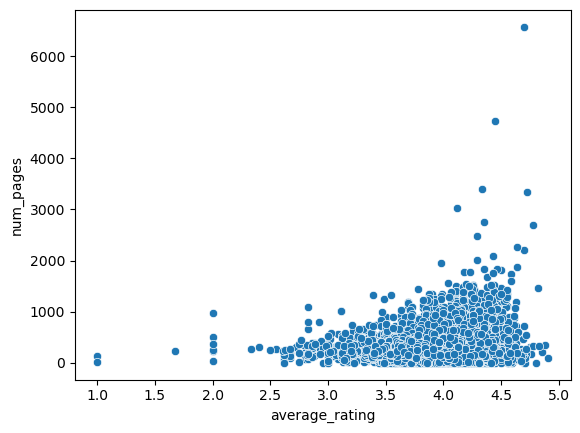

In [926]:
sns.scatterplot(data=bookrate1_df,x="average_rating", y="num_pages")

- We can see a big problem here because we notice a lot of books that have **0 pages** but have high rating averages. This creates a big misunderstanding at our level and we decide to see all the information related to these books. To decide later whether they are useful in our algorithm or not.
- We see some books which have a huge number of pages more than 2000 pages 

-- **Book who have 0 as Numbers of pages**

In [927]:
bookrate1_df[bookrate1_df.num_pages == 0]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
5362,The Summons / The Brethren,John Grisham/Michael Beck/Frank Muller,3.99,0739342770,9780739342770,eng,0,241,9,10/10/2006,Random House Audio
6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio


-- **Book who have less than 30 Numbers of pages**

In [928]:
bookrate1_df[bookrate1_df.num_pages < 30].describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,298.000000,2.980000e+02,298.000000,298.000000,298.000000
mean,3.979732,9.781027e+12,7.808725,1201.332215,43.449664
std,0.355779,1.007294e+09,7.636545,5373.735305,133.553578
min,1.000000,9.780060e+12,0.000000,0.000000,0.000000
25%,3.822500,9.780564e+12,1.000000,18.000000,2.000000
50%,4.000000,9.780754e+12,6.000000,55.500000,7.000000
75%,4.197500,9.781562e+12,12.750000,134.500000,23.750000
max,4.800000,9.789626e+12,29.000000,64395.000000,1617.000000


-- **Book who have more than 2000  pages**

In [929]:
bookrate1_df[bookrate1_df.num_pages > 2000].num_pages

bookID
8        2690
10       3342
3579     2088
20749    2198
23589    2264
24520    6576
25587    4736
25709    3020
30258    2751
40012    2021
43888    2480
44613    3400
Name: num_pages, dtype: int64

**At the end of the exploration of the Numbers of pages bases on the average rating we decide to :**
   - Affect to the books who have the numbers of pages less than 30 the number 30 because we have suppose that a book with a relevant number of pages must have a minimum of 30 pages. firstly we think about replace all of them by the mean of number of pages. But for us it seemed illogical to replace a number of pages lower than 30 by a number of pages of more than 330
   - to use most of the Books who have more than 2000 pages in our modelling just because  they are a symbolic books for us even if they can be a outliers. we have just remove the 2 big one with respectively **"6576"** and **"4736"**

**Affecting books who have less than 30 Pages the number of Pages 30**

In [930]:
bookrate1_df.loc[bookrate1_df["num_pages"] < 30, "num_pages"] = 30
#bookrate1_df.loc[bookrate1_df["num_pages"] < 30, "num_pages"] = bookrate1_df.num_pages.mean().round()

In [931]:
bookrate1_df["num_pages"].describe()

count    11076.000000
mean       337.653575
std        240.440628
min         30.000000
25%        194.000000
50%        300.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

##### Deletion of lines with "6576" and "4736" as Number of page 

In [932]:
 bookrate1_df= bookrate1_df[bookrate1_df.num_pages < 4000]

In [933]:
bookrate1_df["num_pages"].describe()

count    11074.000000
mean       336.693065
std        229.258696
min         30.000000
25%        194.000000
50%        300.000000
75%        416.000000
max       3400.000000
Name: num_pages, dtype: float64

### - Average_rating with rating_counts and text review counts



<Axes: xlabel='average_rating', ylabel='text_reviews_count'>

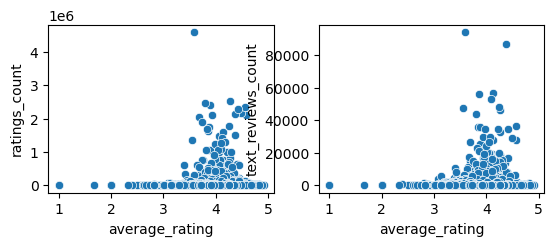

In [934]:
plt.subplot(2,2,1)
sns.scatterplot(data=bookrate1_df,x="average_rating", y="ratings_count")
plt.subplot(2,2,2)
sns.scatterplot(data=bookrate1_df,x="average_rating", y="text_reviews_count")


<Axes: xlabel='average_rating', ylabel='ratings_count'>

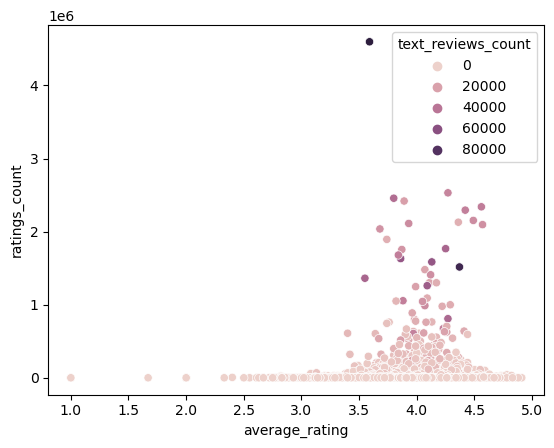

In [935]:
sns.scatterplot(data=bookrate1_df,x="average_rating",y="ratings_count",hue= "text_reviews_count")

<Axes: xlabel='text_reviews_count'>

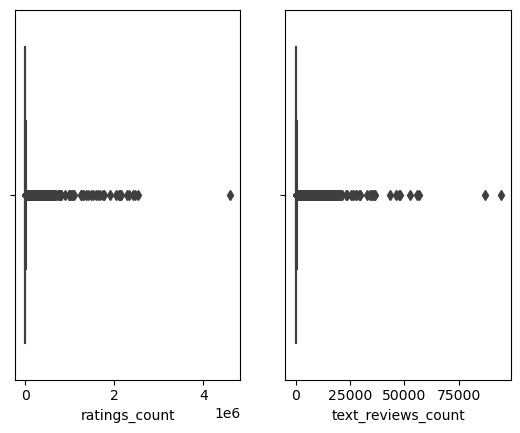

In [936]:
plt.subplot(1,2,1)
sns.boxplot(data=bookrate1_df, x="ratings_count")
plt.subplot(1,2,2)
sns.boxplot(data=bookrate1_df, x="text_reviews_count")

After the different plotting we can see that we have 
 - We have a lot of books who have **"0"** as rating count may be because the book was not interresting for the readers . But All of them have the Average rating more or egal than 2 which is illogical.
 - We have a lot of books who have **"0"** as text_reviews_count may be because reader didn't have the time to make their opinions about the book. this can be explained by many reason.
 - We also see some outliers which can have a bad effect to our model

**Observation of book with "0" rating count and "0" text reviews counts**
- **"0" Rating Count**

In [937]:
dff=bookrate1_df[bookrate1_df.ratings_count == 0]
dff.describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,51.000,5.100000e+01,51.000,51.0,51.00
mean,3.808,9.781644e+12,325.549,0.0,0.02
std,0.484,2.315919e+09,290.868,0.0,0.14
min,2.000,9.780061e+12,30.000,0.0,0.00
25%,3.580,9.780386e+12,64.000,0.0,0.00
50%,3.850,9.780788e+12,285.000,0.0,0.00
75%,4.120,9.781736e+12,462.500,0.0,0.00
max,4.780,9.789812e+12,1088.000,0.0,1.00


- **"0" text reviews count**

In [938]:
 bookrate1_df[bookrate1_df.text_reviews_count == 0].describe().round(3)


,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,583.000,5.830000e+02,583.000,583.000,583.0
mean,3.890,9.732914e+12,276.149,10.407,0.0
std,0.449,6.799948e+11,224.210,14.128,0.0
min,1.000,4.908601e+10,30.000,0.000,0.0
25%,3.700,9.780522e+12,124.000,2.000,0.0
50%,3.940,9.780814e+12,238.000,6.000,0.0
75%,4.140,9.781860e+12,376.000,13.000,0.0
max,4.880,9.789861e+12,2264.000,134.000,0.0


- **Book that have "0" text review and "0" text review count**

In [939]:
dff[dff.text_reviews_count == 0].describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,50.000000,5.000000e+01,50.000000,50.0,50.0
mean,3.813000,9.781507e+12,321.500000,0.0,0.0
std,0.487376,2.120265e+09,292.365947,0.0,0.0
min,2.000000,9.780061e+12,30.000000,0.0,0.0
25%,3.585000,9.780381e+12,64.000000,0.0,0.0
50%,3.865000,9.780769e+12,274.500000,0.0,0.0
75%,4.125000,9.781593e+12,427.250000,0.0,0.0
max,4.780000,9.789812e+12,1088.000000,0.0,0.0


**Observation of  rating count and text reviews counts Outliers**

In [942]:
# Rating counts
bookrate1_df[bookrate1_df.ratings_count > 2000000]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL
7624,Lord of the Flies,William Golding,3.68,0140283331,9780140283334,eng,182,2036679,26199,10/1/1999,Penguin Books


In [943]:
#text_Values count
bookrate1_df[bookrate1_df.text_reviews_count > 50000].describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,5.000,5.000000e+00,5.00,5.000,5.000
mean,4.008,9.780541e+12,358.60,2118174.000,69270.400
std,0.295,5.876058e+08,163.58,1393488.296,19673.728
min,3.590,9.780061e+12,197.00,1260027.000,52759.000
25%,3.860,9.780316e+12,208.00,1516367.000,55843.000
50%,4.090,9.780376e+12,335.00,1585589.000,56604.000
75%,4.130,9.780386e+12,501.00,1631221.000,86881.000
max,4.370,9.781565e+12,552.00,4597666.000,94265.000


In [944]:
#bookrate1_df = bookrate1_df[(bookrate1_df.text_reviews_count < 50000) & (bookrate1_df.ratings_count < 1000000)]

After analysing the rating count we decide 
- To remove the 0 rating count which have the average rating because we didn't undersand the problem who can make this kind of non sense we also decide it because the major part of them **(50 out of 51)** also have "0"as text review count.
- To not remove the 5 value text review more than **"50.000"** or rating count more than **"1.000.000"** even if they can be a outliers values.

#### Deletion of lines with "0" as rating count and text reviews at the same time 

In [945]:
bookrate1_df = bookrate1_df[bookrate1_df.ratings_count > 0]
bookrate1_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11023.000000,1.102300e+04,11023.000000,1.102300e+04,11023.000000
mean,3.941233,9.759684e+12,336.744625,1.810537e+04,546.949288
std,0.292079,4.449760e+11,228.950592,1.129953e+05,2587.765190
min,1.000000,8.987060e+09,30.000000,1.000000e+00,0.000000
25%,3.780000,9.780345e+12,194.000000,1.110000e+02,9.000000
50%,3.960000,9.780573e+12,300.000000,7.680000e+02,48.000000
75%,4.130000,9.780872e+12,416.000000,5.076000e+03,242.000000
max,4.910000,9.790008e+12,3400.000000,4.597666e+06,94265.000000


### E - Average_rating and Non-Numerical value

### Average_rating and publicacion Date
We are going to transform the format of the Date to make it more usable

In [946]:
bookrate1_df['publication_date'] = pd.to_datetime(bookrate1_df['publication_date'], format='%m/%d/%Y', errors='coerce')

In [947]:
bookrate1_df.publication_date.dt.year.shape

(11023,)

- We decided to transform the publication date into Age in order to have an integer variable that could be used in our model because we think that this could be a factor that could influence the average rating of a book.

In [948]:
bookrate1_date = bookrate1_df.publication_date.dt.year
bookrate1_date.describe()

count    11021.000000
mean      2000.187642
std          8.204730
min       1900.000000
25%       1998.000000
50%       2003.000000
75%       2005.000000
max       2020.000000
Name: publication_date, dtype: float64

In [949]:
book_age = 2023 - bookrate1_date
book_age.describe()

count    11021.000000
mean        22.812358
std          8.204730
min          3.000000
25%         18.000000
50%         20.000000
75%         25.000000
max        123.000000
Name: publication_date, dtype: float64

In [950]:
# bookrate1_df = bookrate1_df + book_age

bookrate1_df["book_age"] = book_age

In [951]:
print(bookrate1_df.shape)
#bookrate1_df.drop(columns=["publication_date"]).describe()
bookrate1_df

(11023, 12)


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_age
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,17.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,19.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,20.0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,19.0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21,Da Capo Press,19.0
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01,Penguin Books,35.0
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01,Penguin Books,30.0


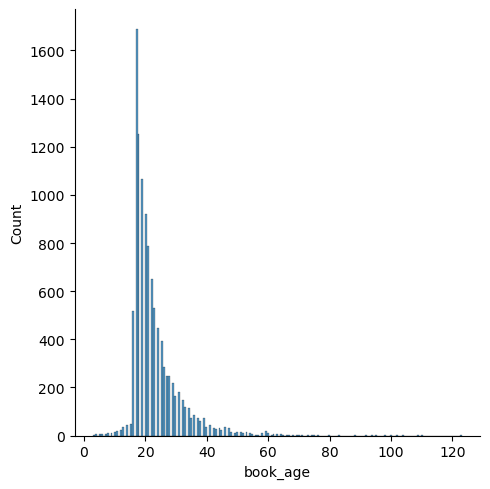

In [952]:
sns.displot(data=bookrate1_df, x="book_age")

<Axes: xlabel='average_rating', ylabel='book_age'>

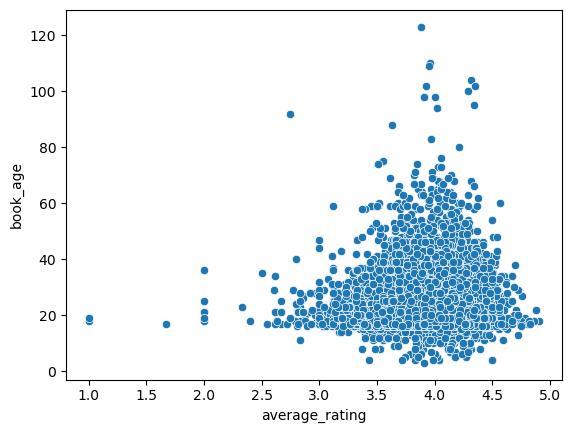

In [953]:
sns.scatterplot(data=bookrate1_df,x="average_rating", y="book_age")

In [954]:
bookrate1_df[bookrate1_df.book_age > 80].describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,book_age
count,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14,14.000000
mean,3.950000,9.780830e+12,396.928571,113.714286,8.428571,1923-04-04 15:25:42.857142784,99.857143
min,2.750000,9.780675e+12,144.000000,4.000000,0.000000,1900-01-01 00:00:00,83.000000
25%,3.915000,9.780675e+12,330.000000,24.500000,2.000000,1919-07-02 18:00:00,94.250000
50%,3.965000,9.780675e+12,424.000000,92.500000,6.000000,1924-01-01 12:00:00,99.000000
75%,4.222500,9.780857e+12,492.000000,139.500000,7.000000,1928-10-01 12:00:00,103.500000
max,4.350000,9.781852e+12,576.000000,365.000000,33.000000,1940-01-01 00:00:00,123.000000
std,0.403999,3.236810e+08,141.086152,115.421254,10.917271,NaN,9.998901


**Searching the "NaN" book_age**

In [955]:
bookrate1_df.loc[bookrate1_df.book_age.isna(),:]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_age
bookID,,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,NaN
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,NaN


#### Affect mean book_age to missing bouk_age

In [956]:
#bookrate1_df =bookrate1_df.drop(index=bookrate1_df.loc[bookrate1_df.publication_date.isna(),:].index)
bookrate1_df.loc[bookrate1_df.book_age.isna(), "book_age"] = book_age.mean().round(0)

In [957]:
bookrate1_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,book_age
count,11023.000000,1.102300e+04,11023.000000,1.102300e+04,11023.000000,11021,11023.000000
mean,3.941233,9.759684e+12,336.744625,1.810537e+04,546.949288,2000-09-04 09:56:51.196806144,22.812392
min,1.000000,8.987060e+09,30.000000,1.000000e+00,0.000000,1900-01-01 00:00:00,3.000000
25%,3.780000,9.780345e+12,194.000000,1.110000e+02,9.000000,1998-08-01 00:00:00,18.000000
50%,3.960000,9.780573e+12,300.000000,7.680000e+02,48.000000,2003-03-01 00:00:00,20.000000
75%,4.130000,9.780872e+12,416.000000,5.076000e+03,242.000000,2005-10-01 00:00:00,25.000000
max,4.910000,9.790008e+12,3400.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00,123.000000
std,0.292079,4.449760e+11,228.950592,1.129953e+05,2587.765190,NaN,8.203986


### Remove all the unuseful attribut for the training of our model

In [1036]:
print(bookrate1_df.shape)
bookrate2_df=bookrate1_df.drop(columns=["language_code","publication_date","title","authors","isbn","isbn13","publisher"])
print(bookrate2_df.shape)

(11023, 12)
(11023, 5)


In [1037]:
bookrate2_df

,average_rating,num_pages,ratings_count,text_reviews_count,book_age
bookID,,,,,
1,4.57,652,2095690,27591,17.0
2,4.49,870,2153167,29221,19.0
4,4.42,352,6333,244,20.0
5,4.56,435,2339585,36325,19.0
8,4.78,2690,41428,164,19.0
...,...,...,...,...,...
45631,4.06,512,156,20,19.0
45633,4.08,635,783,56,35.0
45634,3.96,415,820,95,30.0


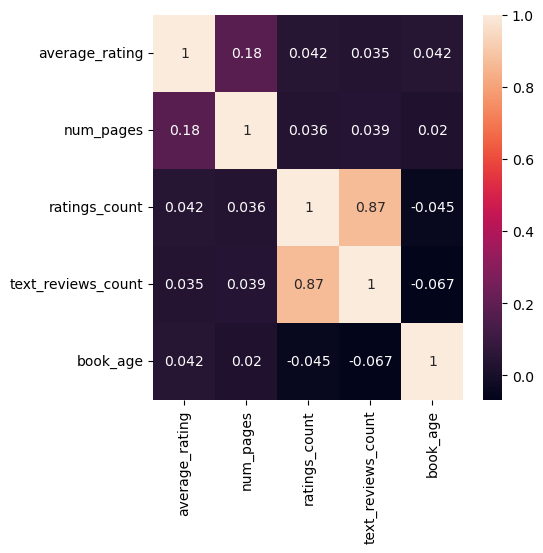

In [1038]:
plt.figure(figsize=(5,5))
sns.heatmap(bookrate2_df.corr(),annot=True)
plt.show()

# 4 - TRAINING OF THE MODEL

 First of all we divide our dataset into 2 parts:
- One part which will allow us to train our model which will have **80% of the data** 
- The second part which will allow us to test our model in order to check the precision of the prediction which will correspond to the rest of the **20% of the data**

In [1039]:
from sklearn.model_selection import train_test_split


In [1040]:
df_train, df_test= train_test_split(bookrate2_df, test_size=0.2)

In [1041]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,book_age
bookID,,,,,
16921,3.88,385,1596,64,23.0
33774,3.53,432,5826,207,21.0
38830,3.23,224,29,7,30.0
36048,3.64,144,47,3,15.0
13382,4.56,30,61,1,18.0
...,...,...,...,...,...
16093,3.79,320,14,0,21.0
35875,4.18,368,61,3,18.0
32769,4.25,184,21719,491,32.0


In [1042]:
len(bookrate1_df)

11023

In [1043]:
len(df_train)

8818

In [1044]:
len(df_test)

2205

### Visualizing the different mean of num_page and printing them
We choise num_page because it's the most relevant attribut for determine the average rating.

In [1045]:
print(bookrate2_df.num_pages.mean())
print(df_train.num_pages.mean())
print(df_test.num_pages.mean())

336.7446248752608
336.3215014742572
338.43673469387755


### Visualizing the means of the different average rating and printing them

In [1046]:
print(bookrate2_df.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9412328767123292
3.9417112723973693
3.939319727891156


In [1047]:
X_train=df_train.loc[:,[ 'ratings_count','num_pages','text_reviews_count',"book_age"]].values

In [1048]:
X_train

array([[1.5960e+03, 3.8500e+02, 6.4000e+01, 2.3000e+01],
       [5.8260e+03, 4.3200e+02, 2.0700e+02, 2.1000e+01],
       [2.9000e+01, 2.2400e+02, 7.0000e+00, 3.0000e+01],
       ...,
       [2.1719e+04, 1.8400e+02, 4.9100e+02, 3.2000e+01],
       [9.9000e+01, 2.6600e+02, 2.7000e+01, 2.2000e+01],
       [4.5000e+01, 3.5200e+02, 3.0000e+00, 2.0000e+01]])

In [1049]:
y_train=df_train.average_rating.values

In [1050]:
y_train

array([3.88, 3.53, 3.23, ..., 4.25, 4.27, 4.18])

In [1051]:
print(X_train)

[[1.5960e+03 3.8500e+02 6.4000e+01 2.3000e+01]
 [5.8260e+03 4.3200e+02 2.0700e+02 2.1000e+01]
 [2.9000e+01 2.2400e+02 7.0000e+00 3.0000e+01]
 ...
 [2.1719e+04 1.8400e+02 4.9100e+02 3.2000e+01]
 [9.9000e+01 2.6600e+02 2.7000e+01 2.2000e+01]
 [4.5000e+01 3.5200e+02 3.0000e+00 2.0000e+01]]


In [1052]:
X_test=df_test.loc[:,[ 'ratings_count','num_pages','text_reviews_count',"book_age"]].values

In [1053]:
y_test=df_test.average_rating.values

### We decided to take the ramdom forest model as a basis for comparison.

In [1054]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [1055]:
rf_model.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [1056]:
y_test_predicted_rf=rf_model.predict(X_test)
y_test_predicted_rf

array([3.9348, 3.9985, 3.7755, ..., 3.8791, 4.085 , 4.1026])

In [1057]:
y_test

array([3.98, 4.25, 4.16, ..., 3.91, 4.37, 3.97])

### Compare the difference between predict and exist average rating

In [1058]:
bookrate2_predict = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_rf.tolist()})
bookrate2_predict['Dif_obrserv'] = (bookrate2_predict["rate_test"] - bookrate2_predict["predict"])
abs(bookrate2_predict.head(15))

,rate_test,predict,Dif_obrserv
0,3.98,3.934800,0.045200
1,4.25,3.998500,0.251500
2,4.16,3.775500,0.384500
3,3.89,3.744400,0.145600
4,3.87,3.973100,0.103100
5,3.78,4.018900,0.238900
6,3.83,3.620400,0.209600
7,3.98,4.144700,0.164700
8,4.13,3.579100,0.550900
9,4.26,4.182058,0.077942


<Axes: >

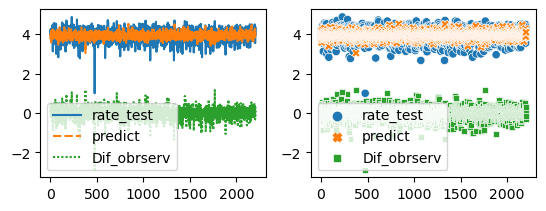

In [1059]:
plt.subplot(2,2,1)
sns.lineplot(data=bookrate2_predict)
plt.subplot(2,2,2)
sns.scatterplot(data=bookrate2_predict)

In [1060]:
abs(bookrate2_predict).describe()

,rate_test,predict,Dif_obrserv
count,2205.000000,2205.000000,2205.000000
mean,3.939320,3.938128,0.213356
std,0.292597,0.138717,0.189513
min,1.000000,3.041800,0.000200
25%,3.770000,3.850300,0.079100
50%,3.960000,3.937300,0.172800
75%,4.130000,4.017300,0.292600
max,4.880000,4.528800,2.877300


### Model accuracy and metrics

In [1061]:
 from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error

print('MAE :', mean_absolute_error(y_pred = y_test_predicted_rf , y_true=y_test).round(3))
print('MSE :', mean_squared_error(y_pred = y_test_predicted_rf , y_true=y_test).round(4))
print('ME :', max_error(y_pred = y_test_predicted_rf , y_true=y_test).round(3))

MAE : 0.213
MSE : 0.0814
ME : 2.877


### others Models

### 1- Decision tree Regressor Model

In [1062]:
from sklearn.tree import DecisionTreeRegressor
dt_model =DecisionTreeRegressor()


In [1063]:
dt_model.fit(X=X_train, y=y_train)

DecisionTreeRegressor()

In [1064]:
y_test_predicted_dt=dt_model.predict(X_test)

In [1065]:
y_test_predicted_dt

array([4.08, 3.95, 3.15, ..., 3.59, 3.94, 4.08])

In [1066]:
y_test

array([3.98, 4.25, 4.16, ..., 3.91, 4.37, 3.97])

In [1067]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict1 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_dt.tolist()})
bookrate2_predict1['Dif_obrserv'] = (bookrate2_predict1["rate_test"] - bookrate2_predict1["predict"])
abs(bookrate2_predict1.head(15))

,rate_test,predict,Dif_obrserv
0,3.98,4.08,0.10
1,4.25,3.95,0.30
2,4.16,3.15,1.01
3,3.89,2.86,1.03
4,3.87,3.93,0.06
5,3.78,4.54,0.76
6,3.83,3.40,0.43
7,3.98,4.38,0.40
8,4.13,3.67,0.46
9,4.26,4.28,0.02


In [1068]:
abs(bookrate2_predict1).describe()

,rate_test,predict,Dif_obrserv
count,2205.000000,2205.000000,2205.000000
mean,3.939320,3.939934,0.303463
std,0.292597,0.312659,0.266357
min,1.000000,2.000000,0.000000
25%,3.770000,3.760000,0.110000
50%,3.960000,3.970000,0.240000
75%,4.130000,4.150000,0.430000
max,4.880000,4.910000,3.000000


<Axes: >

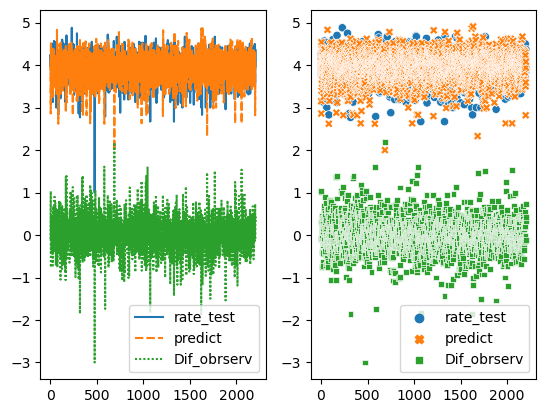

In [1069]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict1)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict1)

In [1070]:

print('MAE :', mean_absolute_error(y_pred = y_test_predicted_dt , y_true=y_test).round(3))
print('MSE :', mean_squared_error(y_pred = y_test_predicted_dt , y_true=y_test).round(3))
print('ME :', max_error(y_pred = y_test_predicted_dt , y_true=y_test).round(3))

MAE : 0.303
MSE : 0.163
ME : 3.0


### 2 - Linear Regression model

In [1071]:
from sklearn.linear_model import LinearRegression
lr_model =LinearRegression()

In [1072]:
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [1073]:
y_test_predicted_lr=lr_model.predict(X_test)

In [1074]:
y_test_predicted_lr

array([3.9915181 , 4.00409636, 3.93377252, ..., 3.90591439, 4.02621739,
       4.0514217 ])

In [1075]:
y_test

array([3.98, 4.25, 4.16, ..., 3.91, 4.37, 3.97])

In [1076]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict2 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_lr.tolist()})
bookrate2_predict2['Dif_obrserv'] = (bookrate2_predict2["rate_test"] - bookrate2_predict2["predict"])
abs(bookrate2_predict2.head(15))

,rate_test,predict,Dif_obrserv
0,3.98,3.991518,0.011518
1,4.25,4.004096,0.245904
2,4.16,3.933773,0.226227
3,3.89,3.900035,0.010035
4,3.87,3.940651,0.070651
5,3.78,3.967640,0.187640
6,3.83,3.943469,0.113469
7,3.98,4.044575,0.064575
8,4.13,3.878734,0.251266
9,4.26,3.907167,0.352833


In [1077]:
abs(bookrate2_predict2).describe()

,rate_test,predict,Dif_obrserv
count,2205.000000,2205.000000,2205.000000
mean,3.939320,3.941875,0.218073
std,0.292597,0.055021,0.188278
min,1.000000,3.859504,0.000095
25%,3.770000,3.907818,0.080255
50%,3.960000,3.931711,0.174824
75%,4.130000,3.960432,0.304095
max,4.880000,4.484138,2.889174


<Axes: >

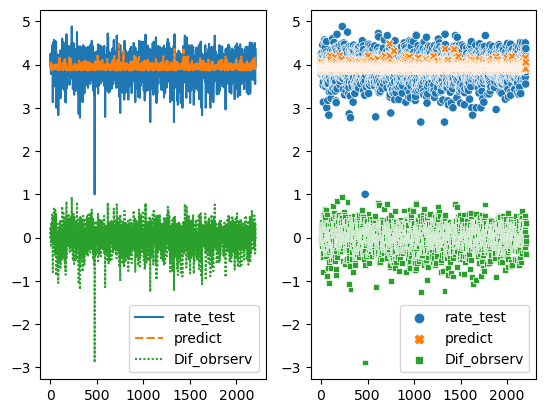

In [1078]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict2)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict2)

In [1079]:
print('MAE :', mean_absolute_error(y_pred = y_test_predicted_lr , y_true=y_test).round(3))
print('MSE :', mean_squared_error(y_pred = y_test_predicted_lr , y_true=y_test).round(4))
print('ME :', max_error(y_pred = y_test_predicted_lr , y_true=y_test).round(3))

MAE : 0.218
MSE : 0.083
ME : 2.889


### 3- Neural Network Regressor Model

In [1080]:
from sklearn.neural_network import MLPRegressor
MLP_model =MLPRegressor()

In [1081]:
MLP_model.fit(X=X_train, y=y_train)

MLPRegressor()

In [1082]:
y_test_predicted_MLP=MLP_model.predict(X_test)
y_test_predicted_MLP

array([ 7.53243057,  1.85229706,  2.87069846, ...,  1.90159404,
       12.84469966,  9.4473907 ])

In [1083]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict3 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_MLP.tolist()})
bookrate2_predict3['Dif_obrserv'] = (bookrate2_predict3["rate_test"] - bookrate2_predict3["predict"])
abs(bookrate2_predict3.head(15))

,rate_test,predict,Dif_obrserv
0,3.98,7.532431,3.552431
1,4.25,1.852297,2.397703
2,4.16,2.870698,1.289302
3,3.89,0.833249,4.723249
4,3.87,5.893181,2.023181
5,3.78,5.604692,1.824692
6,3.83,3.569510,0.260490
7,3.98,10.488445,6.508445
8,4.13,2.738046,1.391954
9,4.26,3.224436,1.035564


<Axes: >

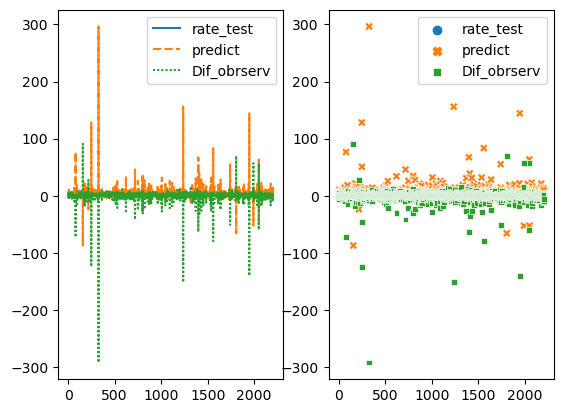

In [1084]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict3)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict3)

In [1085]:
print('Mean Absolute Error :', mean_absolute_error(y_pred = y_test_predicted_MLP , y_true=y_test).round(2))
print('Mean Squared Error :', mean_squared_error(y_pred = y_test_predicted_MLP , y_true=y_test).round(2))
print('Maximum Error :', max_error(y_pred = y_test_predicted_MLP , y_true=y_test).round(2))

Mean Absolute Error : 3.25
Mean Squared Error : 102.73
Maximum Error : 291.97


### Comparing the different model

In [1086]:
compare_Model = pd.DataFrame(np.array([
        ["Random Forest",
        mean_absolute_error(y_pred= y_test_predicted_rf,y_true=y_test).round(4),
        mean_squared_error(y_pred= y_test_predicted_rf,y_true=y_test).round(4),
        max_error(y_pred= y_test_predicted_rf,y_true=y_test).round(3)]
    ,
        ["Decision Tree",
        mean_absolute_error(y_pred= y_test_predicted_dt,y_true=y_test).round(3),
        mean_squared_error(y_pred=y_test_predicted_dt,y_true=y_test).round(3),
        max_error(y_pred=y_test_predicted_dt,y_true=y_test).round(3)]
    ,
        ["Linear Regression",
        mean_absolute_error(y_pred=y_test_predicted_lr,y_true=y_test).round(4),
        mean_squared_error(y_pred=y_test_predicted_lr,y_true=y_test).round(4),
        max_error(y_pred=y_test_predicted_lr,y_true=y_test).round(3)]
    ,
        ["MLPRegressor",
        mean_absolute_error(y_pred=y_test_predicted_MLP,y_true=y_test).round(3),
        mean_squared_error(y_pred=y_test_predicted_MLP,y_true=y_test).round(3),
        max_error(y_pred=y_test_predicted_MLP,y_true=y_test).round(3)],
    ],),
 columns=["Model Name","MAE","MSE","ME"]
)
compare_Model

,Model Name,MAE,MSE,ME
0,Random Forest,0.2134,0.0814,2.877
1,Decision Tree,0.303,0.163,3.0
2,Linear Regression,0.2181,0.083,2.889
3,MLPRegressor,3.251,102.727,291.972
